In [19]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp
from scipy.interpolate import interp1d

nside = 128
lmax = 128

In [48]:
def iqu2teb(IQU, nside, lmax=None):
    alms = hp.map2alm(IQU, lmax=lmax, pol=True)
    return hp.alm2map(alms, nside=nside, lmax=lmax, pol=False)

def teb2iqu(TEB, nside, lmax=None):
    alms = hp.map2alm(TEB, lmax=lmax, pol=False)
    return hp.alm2map(alms, nside=nside, lmax=lmax, pol=True)

# Load data

In [31]:
data_IQU = hp.read_map('./map_mock_des128.fits', field=(0,1,2))
data_IQU[0] *= 1e-5

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


# Convert to TEB (remembering mask problems)

In [46]:
data_TEB = qu2teb(data_IQU, 128, 128*3-1)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


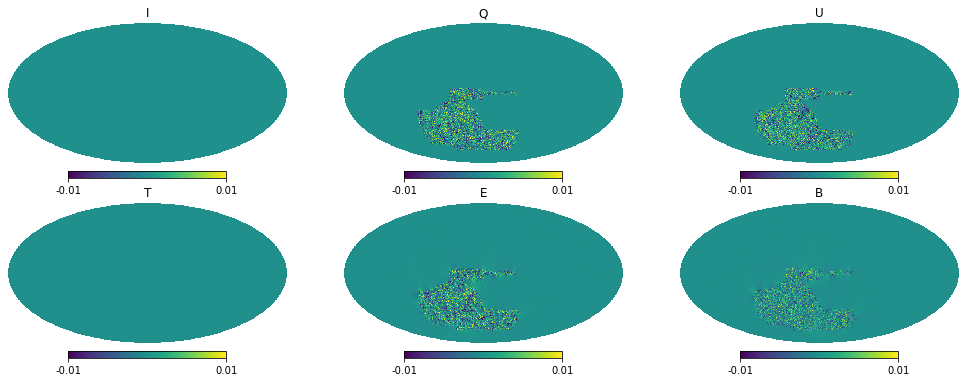

In [47]:
plt.figure(figsize=(14,5))
hp.mollview(data_IQU[0], min=-0.01,max=0.01, sub=(2,3,1), title='I')
hp.mollview(data_IQU[1], min=-0.01,max=0.01, sub=(2,3,2), title='Q')
hp.mollview(data_IQU[2], min=-0.01,max=0.01, sub=(2,3,3), title='U')
hp.mollview(data_TEB[0], min=-0.01,max=0.01, sub=(2,3,4), title='T')
hp.mollview(data_TEB[1], min=-0.01,max=0.01, sub=(2,3,5), title='E')
hp.mollview(data_TEB[2], min=-0.01,max=0.01, sub=(2,3,6), title='B')

# Recover IQU - ud_grade to higher nside 

In [49]:
recovered_IQU = teb2iqu(data_TEB, 128, 128*3-1)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


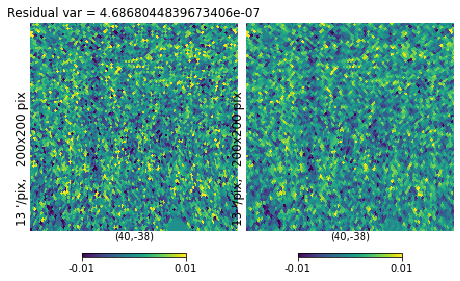

In [59]:
hp.gnomview(data_IQU[1], reso = 13, rot=(40,-38), min = -0.01,max=0.01, sub = (1,2,1) ,
            title = str('Residual var = ' + str(np.var(data_IQU[1]-recovered_IQU[1]))))
hp.gnomview(recovered_IQU[1], reso = 13, rot=(40,-38), min = -0.01,max=0.01, sub = (1,2,2), title=None)

In [62]:
data_TEB_high_nside = iqu2teb(hp.ud_grade(data_IQU,512), 512, 512*3-1)
recovered_IQU_high_nside = hp.ud_grade(teb2iqu(data_TEB_high_nside, 512, 512*3-1),128)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


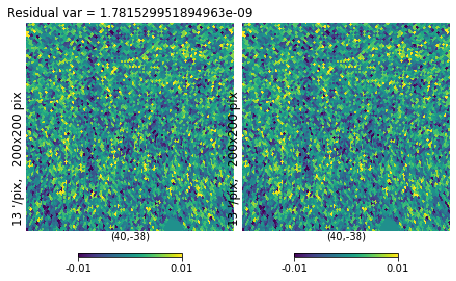

In [64]:
hp.gnomview(data_IQU[1], reso = 13, rot=(40,-38), min = -0.01,max=0.01, sub = (1,2,1) ,
            title = str('Residual var = ' + str(np.var(data_IQU[1]-recovered_IQU_high_nside[1]))))
hp.gnomview(recovered_IQU_high_nside[1], reso = 13, rot=(40,-38), min = -0.01,max=0.01, sub = (1,2,2), title=None)